## We use a simple layer-wise pruning heuristic: remove a percentage of the weights with the lowest magnitudes within each layer (as in Han et al. (2015)). Connections to outputs are pruned at half of the rate of the rest of the network

## Melhores Resultados: P_m = 3.6%, ou seja, no final do processo sobraram apenas 3.6% de todos os pesos existentes.

### Configurações presentes na tabela
#### LeNet 300-100 architecture -> no nosso caso, architecture(28*28, 300, 100, 10)
#### Optmizer: Adam with learning rate of 0.0012
#### Iterations: 50K
#### Batch size: 60
#### Pruning rate: 20%
#### Activation functions: ?
#### Loss Criterion: ?

In [2]:
# import libraries
import torch
import numpy as np

In [3]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 60

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

0it [00:00, ?it/s]

100%|█████████▉| 9895936/9912422 [00:26<00:00, 150918.12it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 89287.47it/s]
32768it [00:00, 59618.94it/s]                           
0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz



 99%|█████████▉| 1638400/1648877 [00:06<00:00, 384069.82it/s]

0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 20860.37it/s]            

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:40, 150918.12it/s]                             
1654784it [00:22, 384069.82it/s]                             

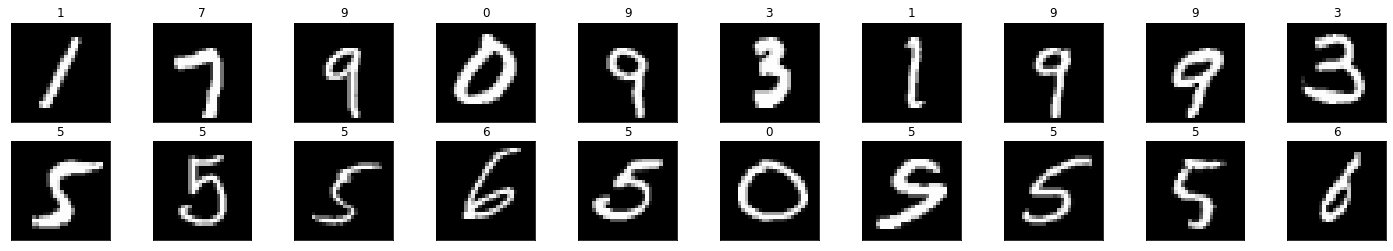

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [5]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [9]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # The input is a flatted image of size 28*28
        self.fc1 = nn.Linear(28 * 28, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        return out

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [12]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0012)

# Backup the model
initial_model = model

In [13]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.327777
Epoch: 2 	Training Loss: 0.293461
Epoch: 3 	Training Loss: 0.276996
Epoch: 4 	Training Loss: 0.266958
Epoch: 5 	Training Loss: 0.258811
Epoch: 6 	Training Loss: 0.252530
Epoch: 7 	Training Loss: 0.249834
Epoch: 8 	Training Loss: 0.249537
Epoch: 9 	Training Loss: 0.244774
Epoch: 10 	Training Loss: 0.245199
Epoch: 11 	Training Loss: 0.242243
Epoch: 12 	Training Loss: 0.242387
Epoch: 13 	Training Loss: 0.241141
Epoch: 14 	Training Loss: 0.239664
Epoch: 15 	Training Loss: 0.239845
Epoch: 16 	Training Loss: 0.239021
Epoch: 17 	Training Loss: 0.239084
Epoch: 18 	Training Loss: 0.239958
Epoch: 19 	Training Loss: 0.237896
Epoch: 20 	Training Loss: 0.238906
Epoch: 21 	Training Loss: 0.238827
Epoch: 22 	Training Loss: 0.238190
Epoch: 23 	Training Loss: 0.236210
Epoch: 24 	Training Loss: 0.237005
Epoch: 25 	Training Loss: 0.236598
Epoch: 26 	Training Loss: 0.239564
Epoch: 27 	Training Loss: 0.236660
Epoch: 28 	Training Loss: 0.236337
Epoch: 29 	Training Loss: 0.2

In [15]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print("Calculating the Loss of the trained model")
print('\tTest Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('\tTest Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('\tTest Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\n\tTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
print("")

Calculating the Loss of the trained model
	Test Loss: 0.361771

	Test Accuracy of     0: 99% (973/980)
	Test Accuracy of     1: 99% (1126/1135)
	Test Accuracy of     2: 97% (1010/1032)
	Test Accuracy of     3: 98% (994/1010)
	Test Accuracy of     4: 98% (965/982)
	Test Accuracy of     5: 96% (862/892)
	Test Accuracy of     6: 98% (945/958)
	Test Accuracy of     7: 98% (1008/1028)
	Test Accuracy of     8: 96% (940/974)
	Test Accuracy of     9: 96% (976/1009)

	Test Accuracy (Overall): 97% (9799/10000)



In [17]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

initial_model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = initial_model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print("Calculating the Loss of the initial model")
print('\tTest Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('\tTest Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('\tTest Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\n\tTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Calculating the Loss of the initial model
	Test Loss: 0.361771

	Test Accuracy of     0: 99% (973/980)
	Test Accuracy of     1: 99% (1126/1135)
	Test Accuracy of     2: 97% (1010/1032)
	Test Accuracy of     3: 98% (994/1010)
	Test Accuracy of     4: 98% (965/982)
	Test Accuracy of     5: 96% (862/892)
	Test Accuracy of     6: 98% (945/958)
	Test Accuracy of     7: 98% (1008/1028)
	Test Accuracy of     8: 96% (940/974)
	Test Accuracy of     9: 96% (976/1009)

	Test Accuracy (Overall): 97% (9799/10000)


In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))